In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("General_Payment_Data___Detailed_Dataset_2014_Reporting_Year.csv", dtype={'Physician_Profile_ID': 'S'} )

/Users/epetenko/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,24,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index([u'Change_Type', u'Covered_Recipient_Type', u'Teaching_Hospital_CCN',
       u'Teaching_Hospital_ID', u'Teaching_Hospital_Name',
       u'Physician_Profile_ID', u'Physician_First_Name',
       u'Physician_Middle_Name', u'Physician_Last_Name',
       u'Physician_Name_Suffix',
       u'Recipient_Primary_Business_Street_Address_Line1',
       u'Recipient_Primary_Business_Street_Address_Line2', u'Recipient_City',
       u'Recipient_State', u'Recipient_Zip_Code', u'Recipient_Country',
       u'Recipient_Province', u'Recipient_Postal_Code',
       u'Physician_Primary_Type', u'Physician_Specialty',
       u'Physician_License_State_code1', u'Physician_License_State_code2',
       u'Physician_License_State_code3', u'Physician_License_State_code4',
       u'Physician_License_State_code5',
       u'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       u'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       u'Applicable_Manufacturer_or_Applicable_GPO_Making_Paymen

In [4]:
df['Total_Amount_of_Payment_USDollars'] = df['Total_Amount_of_Payment_USDollars'].astype(float)

In [7]:
matalon = df[df["Physician_Last_Name"] == "MATALON"]

In [9]:
matalon.pivot_table(index='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False)

Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
AbbVie, Inc.                                  955.60
Takeda Pharmaceuticals U.S.A., Inc.           321.71
Janssen Pharmaceuticals, Inc                  301.55
Pfizer Inc.                                   216.37
Novo Nordisk Inc                              197.52
Purdue Pharma L.P.                            192.93
INSYS Therapeutics Inc                        176.03
Salix Pharmaceuticals, Ltd                    155.51
Eisai Inc.                                    132.55
Baxter Healthcare                              92.88
Endo Pharmaceuticals Inc.                      39.50
VIVUS, Inc.                                    15.37
Eli Lilly and Company                          14.23
Boehringer Ingelheim Pharmaceuticals, Inc.     12.54
Forest Laboratories, Inc.                      10.88
BOSTON SCIENTIFIC CORPORATION                  10.36
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [5]:
top_drugs = df.groupby("Name_of_Associated_Covered_Drug_or_Biological1").sum().iloc[:,5].sort_values(ascending=False)

In [7]:
top_NJcities = df.groupby('Recipient_City').sum().iloc[:,6].sort_values(ascending=False)

In [8]:
categories = df.groupby('Nature_of_Payment_or_Transfer_of_Value').sum().iloc[:,5].sort_values(ascending=False)

In [9]:
categories

Nature_of_Payment_or_Transfer_of_Value
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program    1.455745e+07
Consulting Fee                                                                                                                                        1.071548e+07
Food and Beverage                                                                                                                                     9.758228e+06
Royalty or License                                                                                                                                    5.944905e+06
Travel and Lodging                                                                                                                                    4.388671e+06
Honoraria                                                                                                                                         

In [10]:
biggest_payers = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum().iloc[:,6].sort_values(ascending=False)

In [11]:
biggest_takers = df.groupby('Physician_Profile_ID').sum().iloc[:,5].sort_values(ascending=False)

In [15]:
top_drugs.to_csv("2014data/top_drugs_2014.csv")

In [16]:
df['Total_Amount_of_Payment_USDollars'].sum()

54681116.99000505

In [17]:
top_hospitals = df.groupby('Teaching_Hospital_Name').sum().iloc[:,6].sort_values(ascending=False)

In [18]:
top_doctors = df.pivot_table(index=["Physician_Profile_ID", 'Physician_First_Name', 'Physician_Last_Name'], aggfunc=sum).sort_values(by="Total_Amount_of_Payment_USDollars", ascending=False)

In [16]:
top_doctors_details = df.pivot_table(index=["Physician_Profile_ID", 'Physician_First_Name', 'Physician_Last_Name', "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name", "Nature_of_Payment_or_Transfer_of_Value"], aggfunc=sum).sort_values(by="Total_Amount_of_Payment_USDollars", ascending=False)

In [6]:
#used this to search for docs under each drug name
#used "top drugs" spreadsheet to make sure was using correct names
#also searched under "Name...Biological2", "Name...Biological3", etc. 
#and used csvstack to combine all of those into one document

subsys = df[df['Name_of_Associated_Covered_Drug_or_Biological1'] == "Subsys"]
subsys['Physician_Profile_ID'].count()

1543

In [24]:
subsys.to_csv("2014data/Subsys.csv")

In [25]:
subsys.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)
#Subsys manufactured by Insys

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
345992                APURV                 AGRAWAL                80044.17
206178                DAVID                 CONYACK                70668.26
121352                MUKARAM               GAZI                   70259.48
344896                MANOJ                 PATHARKAR              48506.56
311919                SERGE                 MENKIN                 38857.24
26227                 KIERAN                SLEVIN                 38251.66
977249                JOSE                  CONTRERAS              30189.64
61465                 FELIX                 ROQUE                  30128.63
21886                 SAMYADEV              DATTA                  27600.56
106319                GARY                  YEN                    25477.23
168121                ROBERT                CHAPDELAINE            24979.24
219255                JEFFREY               GUDIN                  23656.07
316185                HA

In [9]:
subsys["Total_Amount_of_Payment_USDollars"].sum()

619394.5500000006

In [20]:
#taken from CMS list of opioids
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
allopioids = ['ABSTRAL', 
'ACETAMINOPHEN-CODEINE', 
'ACTIQ', 
'ASCOMP WITH CODEINE', 
'ASPIRIN-CAFFEINE-DIHYDROCODEIN', 
'AVINZA', 
'BELLADONNA-OPIUM', 
'BUPRENORPHINE HCL', 
'BUTALB-ACETAMINOPH-CAFF-CODEIN', 
'BUTALB-CAFF-ACETAMINOPH-CODEIN', 
'BUTALBITAL COMPOUND-CODEINE', 
'BUTORPHANOL TARTRATE', 
'BUTRANS', 
'CAPITAL W-CODEINE', 
'CARISOPRODOL COMPOUND-CODEINE', 
'CARISOPRODOL-ASPIRIN-CODEINE', 
'CODEINE SULFATE', 
'CO-GESIC', 
'CONZIP', 
'DEMEROL', 
'DEMEROL', 
'DILAUDID', 
'DILAUDID', 
'DILAUDID-HP', 
'DISKETS', 
'DOLOPHINE HCL', 
'DURAGESIC', 
'DURAMORPH', 
'ENDOCET', 
'ENDODAN', 
'EXALGO', 
'FENTANYL', 
'FENTANYL CITRATE', 
'FENTORA', 
'FIORICET WITH CODEINE', 
'FIORINAL WITH CODEINE #3', 
'HYCET', 
'HYDROCODONE-ACETAMINOPHEN', 
'HYDROCODONE-IBUPROFEN', 
'HYDROMORPHONE ER', 
'HYDROMORPHONE HCL', 
'HYDROMORPHONE HCL', 
'IBUDONE', 
'INFUMORPH', 
'KADIAN', 
'LAZANDA', 
'LEVORPHANOL TARTRATE', 
'LORCET', 
'LORCET 10-650', 
'LORCET HD', 
'LORCET PLUS', 
'LORTAB', 
'MAGNACET', 
'MEPERIDINE HCL', 
'MEPERIDINE HCL', 
'MEPERITAB', 
'METHADONE HCL', 
'METHADONE INTENSOL', 
'METHADOSE', 
'MORPHINE SULFATE', 
'MORPHINE SULFATE', 
'MORPHINE SULFATE ER', 
'MS CONTIN', 
'NALBUPHINE HCL', 
'NORCO', 
'NUCYNTA', 
'NUCYNTA ER', 
'OPANA', 
'OPANA ER', 
'OPIUM TINCTURE', 
'OXECTA', 
'OXYCODONE HCL', 
'OXYCODONE HCL ER', 
'OXYCODONE HCL-ASPIRIN', 
'OXYCODONE HCL-IBUPROFEN', 
'OXYCODONE-ACETAMINOPHEN', 
'OXYCONTIN', 
'OXYMORPHONE HCL', 
'OXYMORPHONE HCL ER', 
'PENTAZOCINE-ACETAMINOPHEN', 
'PENTAZOCINE-NALOXONE HCL', 
'PERCOCET', 
'PERCODAN', 
'PRIMLEV', 
'REPREXAIN', 
'ROXICET', 
'ROXICODONE', 
'RYBIX ODT', 
'STAGESIC', 
'SUBSYS', 
'SYNALGOS-DC', 
'TALWIN', 
'TRAMADOL HCL', 
'TRAMADOL HCL ER', 
'TRAMADOL HCL-ACETAMINOPHEN', 
'TREZIX', 
'TYLENOL-CODEINE NO.3', 
'TYLENOL-CODEINE NO.4', 
'ULTRACET', 
'ULTRAM', 
'ULTRAM ER', 
'VICODIN', 
'VICODIN ES', 
'VICODIN HP', 
'VICOPROFEN', 
'XARTEMIS XR', 
'XODOL 10-300', 
'XODOL 5-300', 
'XODOL 7.5-300', 
'XYLON 10', 
'ZAMICET', 
'ZOHYDRO ER', 
'ZOLVIT']

In [21]:
def druglist():
    for n in allopioids:
        thisdrug = df[df['Name_of_Associated_Covered_Drug_or_Biological1'] == n]
        if thisdrug['Physician_Profile_ID'].count() > 1:
            thisdrug.to_csv("2014data/(%s).csv" %n)


In [22]:
druglist()

In [ ]:
# emb = pd.read_csv("2014data/.csv")
# emb.head()

# emb.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)
# #embeda owned by Pfizer

In [26]:
nuc = pd.read_csv("2014data/(NUCYNTA).csv")
nuc.head()

nuc.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)
#appears to be manufactured by Depomed now
#but was acquired by Janssen in 2015

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
98487                 ROBERT                MARINI                 6.00
305695                BARRY                 FASS                   4.17
238847                SANDEEP               RATHI                  4.17
26227                 KIERAN                SLEVIN                 4.17
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [27]:
opa = pd.read_csv("2014data/(OPANA ER).csv")
opa.head()

opa.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
#owned by Endo Pharma, which also manufacturers Percs
#payments totaled ~600

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
30315                 RISHIN                PATEL                  152.75
225940                MANISH                SINGH                   99.46
327281                JOHN                  PARK                    99.06
1076765               JOHN                  DACONTI                 87.32
291820                GARY                  BUCK                    83.60
82696                 RAUL                  VALCARCEL               72.38
226360                SARATH                BABU                    54.69
26227                 KIERAN                SLEVIN                  46.56
30528                 PAMELA                TRAISAK                 39.50
85753                 GABRIELLA             GUTMAN                  39.50
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [28]:
abstral = pd.read_csv("2014data/(ABSTRAL).csv")
abstral.head()

abstral.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
#submitted by Galena
#owned by sentyl

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
145653                Louis                 Spagnoletti            6389.31
150502                JOSEPH                VALENZA                6286.93
1134320               JENNIFER              SAYANLAR                502.79
311919                SERGE                 MENKIN                  266.38
270452                MICHAEL               DOBROW                  225.39
268600                TODD                  KOPPEL                  181.37
139483                FRANCIS               FORTE                   139.74
292899                SETH                  STOLLER                 128.08
277474                ISAIAH                FLORENCE                114.18
682478                SUSAN                 SISBARRO                110.45
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [10]:
fentora = pd.read_csv("2014data/(FENTORA).csv")

fentora.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
#by Teva?

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
150502                Joseph                Valenza                51341.14
145653                Louis                 Spagnoletti            29410.53
219255                Jeffrey               Gudin                  11300.19
140224                Benjamin              Duckles                10784.50
82076                 Jay                   Bowen                   9972.97
225940                Manish                Singh                   4986.61
26227                 Kieran                Slevin                  4906.91
210831                Matthew               Lipp                    3908.46
201446                Andrew                Kaufman                 3858.07
118540                Jessica               Israel                  2416.79
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [11]:
fentora["Total_Amount_of_Payment_USDollars"].sum()

143616.1300000001

In [36]:
# xar = pd.read_csv("Opioid_payments/(XARTEMIS XR).csv")

# xar.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
# #by Mallinckrodt

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
150502                JOSEPH                VALENZA                2160.46
327281                JOHN                  PARK                   1729.12
158234                ANTHONY               GREENBERG               142.95
1298924               JOHN                  VITOLO                  124.55
82023                 THOMAS                LAMMERTSE               124.55
203705                MICHELINA             DESANTI                 124.55
140224                BENJAMIN              DUCKLES                  67.07
109447                MICHAEL               DISTEFANO                38.09
138603                ROBERT                KAYAL                    32.00
43814                 ANTHONY               SERGI                    27.50
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [39]:
# zoh = pd.read_csv("Opioid_payments/(ZOHYDRO ER).csv")

# zoh.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
# #by Pernix

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
150502                JOSEPH                VALENZA                4308.57
939289                JOSHUA                ARMSTRONG               124.73
191664                JOSEPH                IBRAHIM                 118.82
309166                KAZIMIERZ             SZCZECH                 113.41
124983                RICHARD               HADDAD                   79.88
158234                ANTHONY               GREENBERG                73.79
345990                ASMA                  SIDDIQUI                 70.90
268600                TODD                  KOPPEL                   66.12
26227                 KIERAN                SLEVIN                   59.70
1173710               IVAN                  CHEN                     56.52
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [30]:
def druglistsecondary():
    for n in allopioids:
        thisdrug = df[df['Name_of_Associated_Covered_Drug_or_Biological2'] == n]
        thisdrugthree = df[df['Name_of_Associated_Covered_Drug_or_Biological3'] == n]
        thisdrugfour = df[df['Name_of_Associated_Covered_Drug_or_Biological4'] == n]
        if thisdrug['Physician_Profile_ID'].count() > 1:
            thisdrug.to_csv("Opioid_payments/(%s)2.csv" %n)
            if thisdrugthree['Physician_Profile_ID'].count() > 1:
                thisdrugthree.to_csv("Opioid_payments/(%s)3.csv" %n)
                if thisdrugfour['Physician_Profile_ID'].count() > 1:
                    thisdrugfour.to_csv("Opioid_payments/(%s)4.csv" %n)
        if thisdrugthree['Physician_Profile_ID'].count() > 1:
            thisdrug.to_csv("Opioid_payments/(%s)3.csv" %n)
            if thisdrugfour['Physician_Profile_ID'].count() > 1:
                thisdrugfour.to_csv("Opioid_payments/(%s)4.csv" %n)
        if thisdrugfour['Physician_Profile_ID'].count() > 1:
            thisdrugfour.to_csv("Opioid_payments/(%s)4.csv" %n)

In [31]:
druglistsecondary()

In [36]:
df[df['Name_of_Associated_Covered_Drug_or_Biological4'] == "OXYCONTIN"]

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,NDC_of_Associated_Covered_Drug_or_Biological3,NDC_of_Associated_Covered_Drug_or_Biological4,NDC_of_Associated_Covered_Drug_or_Biological5,Name_of_Associated_Covered_Device_or_Medical_Supply1,Name_of_Associated_Covered_Device_or_Medical_Supply2,Name_of_Associated_Covered_Device_or_Medical_Supply3,Name_of_Associated_Covered_Device_or_Medical_Supply4,Name_of_Associated_Covered_Device_or_Medical_Supply5,Program_Year,Payment_Publication_Date


In [38]:
oxy = pd.read_csv("2014data/Oxycontintotal.csv")

oxy.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)


Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
161164                QAISAR                USMANI                 211.72
312151                TED                   FREEMAN                203.49
44592                 SHAHZAD               HUSSAIN                190.67
131006                KEVIN                 DUNN                   188.95
237550                GERARD                MALANGA                180.13
347609                MONTE                 HABER                  174.51
294486                VIVEK                 DAS                    173.27
109447                MICHAEL               DISTEFANO              171.54
27461                 EDWARD                PRINS                  168.08
1237597               MUHAMMED              AYUB                   167.60
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [41]:
df[df['Name_of_Associated_Covered_Drug_or_Biological3'] == "BUTRANS"]

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,NDC_of_Associated_Covered_Drug_or_Biological3,NDC_of_Associated_Covered_Drug_or_Biological4,NDC_of_Associated_Covered_Drug_or_Biological5,Name_of_Associated_Covered_Device_or_Medical_Supply1,Name_of_Associated_Covered_Device_or_Medical_Supply2,Name_of_Associated_Covered_Device_or_Medical_Supply3,Name_of_Associated_Covered_Device_or_Medical_Supply4,Name_of_Associated_Covered_Device_or_Medical_Supply5,Program_Year,Payment_Publication_Date


In [42]:
but = pd.read_csv("2014data/Butranstotal.csv")

but.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)


Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
150502.0              JOSEPH                VALENZA                16404.96
219255.0              JEFFREY               GUDIN                  14932.91
201446.0              ANDREW                KAUFMAN                10539.36
210831.0              MATTHEW               LIPP                    7180.93
225940.0              MANISH                SINGH                   1408.80
312151.0              TED                   FREEMAN                  289.27
27461.0               EDWARD                PRINS                    268.08
1076765.0             JOHN                  DACONTI                  252.16
241732.0              GREGORY               CHARKO                   236.53
8089.0                EDWARD                NOVIK                    233.71
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  4.52300000e+05,   7.90000000e+01,   2.80000000e+01,
          1.20000000e+01,   6.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00]),
 array([      0.   ,   21731.164,   43462.328,   65193.492,   86924.656,
         108655.82 ,  130386.984,  152118.148,  173849.312,  195580.476,
         217311.64 ,  239042.804,  260773.968,  282505.132,  304236.296,
         325967.46 ,  347698.624,  369429.788,  391160.952,  412892.116,
         434623.28 ]),
 <a list of 20 Patch objects>)

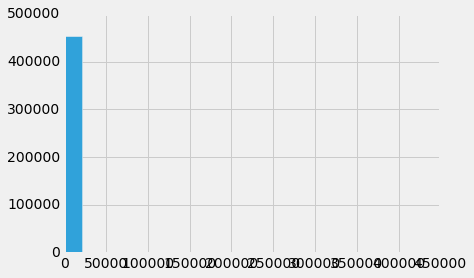

In [45]:
plt.style.use('fivethirtyeight')
plt.hist(df["Total_Amount_of_Payment_USDollars"], bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x11b791d50>],
 'caps': [<matplotlib.lines.Line2D at 0x11ca2ba10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ca3ad10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11ca3a6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11ca1ecd0>,
  <matplotlib.lines.Line2D at 0x11ca2b3d0>]}

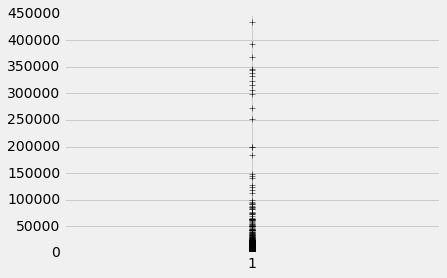

In [46]:
plt.boxplot(df["Total_Amount_of_Payment_USDollars"])

In [7]:
df[df["Name_of_Associated_Covered_Drug_or_Biological1"] == "Lazanda"].to_csv("2014data/LAZANDA.csv")

In [9]:
laz = pd.read_csv("2014data/LAZANDA.csv")
laz.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
219255                JEFFREY               GUDIN                  19455.34
21886                 SAMYADEV              DATTA                   6632.43
61465                 FELIX                 ROQUE                    265.76
145653                LOUIS                 SPAGNOLETTI              211.98
977249                JOSE                  CONTRERAS                171.00
336785                LEWIS                 ATTAS                    164.70
1134320               JENNIFER              SAYANLAR                 154.53
291820                GARY                  BUCK                     150.87
317305                UZMA                  PARVEZ                   136.80
383027                ROBERT                VRABLIK                  135.85
Name: Total_Amount_of_Payment_USDollars, dtype: float64